In [29]:
%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns



import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf

import geopandas as gpd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

from mpl_toolkits.axes_grid.inset_locator import inset_axes

from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

saveFigures is set to: True
Done loading packages


In [30]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

In [31]:
np.sort(list(os.walk(path_dash))[0][1])[-1]

'SSI_dashboard_2022-03-07'

# Get data

In [32]:
# Get case data
latestsubdir = np.sort(list(os.walk(path_dash))[0][1])[-1]
latestdir = path_dash + latestsubdir

dfCase = pd.read_csv(latestdir+'/Kommunalt_DB/07_bekraeftede_tilfaelde_pr_dag_pr_kommune.csv',encoding='latin1',delimiter=';')
dfCase['Dato'] = pd.to_datetime(dfCase['Dato'])
dfCase.tail()

,Kommune,Kommunenavn,Dato,Bekræftede tilfælde i alt
53160,461,Odense,2022-03-07,1
53161,621,Kolding,2022-03-07,1
53162,630,Vejle,2022-03-07,1
53163,657,Herning,2022-03-07,1
53164,740,Silkeborg,2022-03-07,1


In [33]:

dfKort = pd.read_csv(latestdir+'/Kommunalt_DB/10_Kommune_kort.csv',encoding='latin1',delimiter=';')
# dfKort['Dato'] = pd.to_datetime(dfKort['Dato'])

In [34]:
def getPopCount(komNavn):
    return int(dfKort[dfKort['Kommunenavn'] == komNavn]['Antal borgere'].iloc[0])

In [35]:
dateRange = dfCase.Dato.unique()
asdf = pd.DataFrame()
asdf['Dato'] = dateRange 

In [36]:
def getTimeSeries(komNavn,dateRange):

    thisdf = dfCase[dfCase.Kommunenavn == komNavn]
    thisdf = thisdf.merge(pd.DataFrame({'Dato':dateRange}),how='right')

    return thisdf['Bekræftede tilfælde i alt'].fillna(0).values

In [37]:
# # getPopCount('')

# plt.figure() 
# plt.plot(dfCount.Dato,np.cumsum(dfCount.iloc[:,1:].sum(axis=1)))
# plt.grid()

/tmp/ipykernel_2766/56307850.py:7: RuntimeWarning: divide by zero encountered in log10
  curCountLog = np.log10(getTimeSeries(komNavn,dateRange))
/tmp/ipykernel_2766/56307850.py:9: RuntimeWarning: divide by zero encountered in log10
  curRatioLog = np.log10(curRatio)
/tmp/ipykernel_2766/56307850.py:17: RuntimeWarning: divide by zero encountered in log10
  curCountLog = np.log10(getTimeSeries(komNavn,dateRange))
/tmp/ipykernel_2766/56307850.py:19: RuntimeWarning: divide by zero encountered in log10
  curRatioLog = np.log10(curRatio)
/tmp/ipykernel_2766/56307850.py:27: RuntimeWarning: divide by zero encountered in log10
  curCountLog = np.log10(getTimeSeries(komNavn,dateRange))
/tmp/ipykernel_2766/56307850.py:29: RuntimeWarning: divide by zero encountered in log10
  curRatioLog = np.log10(curRatio)


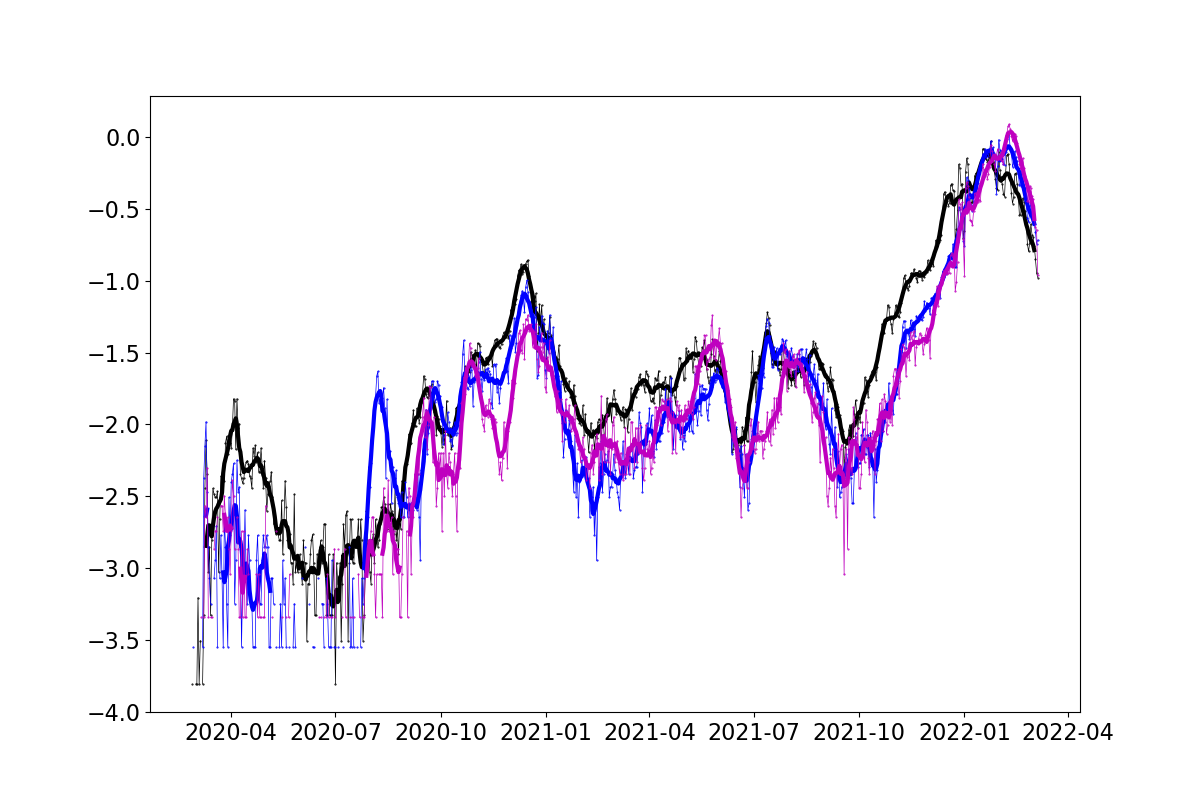

In [38]:

plt.figure() 


komNavn = 'København'
dateRange = dfCase.Dato.unique()[:-1]
curCount = getTimeSeries(komNavn,dateRange)
curCountLog = np.log10(getTimeSeries(komNavn,dateRange))
curRatio = 100*curCount/getPopCount(komNavn)
curRatioLog = np.log10(curRatio)

plt.plot(dateRange,curRatioLog,'k.-',markersize=1,linewidth=0.5)
plt.plot(pf.rnTime(dateRange),pf.rnMean(curRatioLog),'k')

komNavn = 'Århus'
dateRange = dfCase.Dato.unique()[:-1]
curCount = getTimeSeries(komNavn,dateRange)
curCountLog = np.log10(getTimeSeries(komNavn,dateRange))
curRatio = 100*curCount/getPopCount(komNavn)
curRatioLog = np.log10(curRatio)

plt.plot(dateRange,curRatioLog,'b.-',markersize=1,linewidth=0.5)
plt.plot(pf.rnTime(dateRange),pf.rnMean(curRatioLog),'b')

komNavn = 'Aalborg'
dateRange = dfCase.Dato.unique()[:-1]
curCount = getTimeSeries(komNavn,dateRange)
curCountLog = np.log10(getTimeSeries(komNavn,dateRange))
curRatio = 100*curCount/getPopCount(komNavn)
curRatioLog = np.log10(curRatio)

plt.plot(dateRange,curRatioLog,'m.-',markersize=1,linewidth=0.5)
plt.plot(pf.rnTime(dateRange),pf.rnMean(curRatioLog),'m')

In [39]:
# Collect data to use in dataframe 
dateRange = dfCase.Dato.unique()[:-1]
dfCount = pd.DataFrame() 
dfCount['Dato'] = dateRange
dfRatio = pd.DataFrame() 
dfRatio['Dato'] = dateRange


dateRangeRM = pf.rnTime(dfCase.Dato.unique()[:-1])
dfMean = pd.DataFrame()
dfMean['Dato'] = dateRangeRM
dfRatioMean = pd.DataFrame()
dfRatioMean['Dato'] = dateRangeRM

for komNavn in dfCase.Kommunenavn.unique():
    curCount = getTimeSeries(komNavn,dateRange)
    curRatio = getTimeSeries(komNavn,dateRange)/getPopCount(komNavn)
    dfCount[komNavn] = curCount
    dfRatio[komNavn] = curRatio
    dfMean[komNavn] = pf.rnMean(curCount)
    dfRatioMean[komNavn] = pf.rnMean(curRatio)

In [40]:
dfRatioMean.tail()

,Dato,Roskilde,København,Århus,Frederiksberg,Kalundborg,Middelfart,Gentofte,Solrød,Dragør,...,Ikast-Brande,Ringsted,Struer,Brønderslev,Hedensted,Varde,Læsø,Ærø,Fanø,Samsø
728,2022-02-27,0.002831,0.002055,0.003048,0.002241,0.002682,0.003748,0.001941,0.002473,0.002549,...,0.003815,0.002453,0.004001,0.004444,0.003724,0.003344,0.004419,0.006674,0.002756,0.003741
729,2022-02-28,0.002676,0.001945,0.002913,0.002176,0.002658,0.003654,0.001895,0.002467,0.002441,...,0.003620,0.002299,0.004001,0.004172,0.003736,0.003229,0.004258,0.006674,0.002923,0.003433
730,2022-03-01,0.002550,0.001890,0.002836,0.002134,0.002584,0.003480,0.001889,0.002461,0.002412,...,0.003531,0.002140,0.003980,0.003995,0.003590,0.003275,0.004258,0.006793,0.002923,0.003201
731,2022-03-02,0.002459,0.001824,0.002730,0.002105,0.002454,0.003495,0.001883,0.002497,0.002363,...,0.003460,0.002185,0.003925,0.003723,0.003636,0.003275,0.004178,0.006436,0.002881,0.003201
732,2022-03-03,0.002272,0.001711,0.002568,0.001996,0.002258,0.003224,0.001794,0.002383,0.002304,...,0.003419,0.001949,0.003698,0.003107,0.003424,0.003197,0.004017,0.005700,0.003007,0.003240


# Make maps

In [41]:
def getGeo(curKom):
    if (curKom == 'Aabenraa'):
        curKom = 'Åbenrå'
    if (curKom == 'Nordfyn'):
        curKom = 'Nordfyns'
    if (curKom == 'København'):
        curKom = 'Københavns'
    if (curKom == 'Bornholm'):
        curKom = 'Bornholms'
    if (curKom == 'Faaborg-Midtfyn'):
        curKom = 'Fåborg-Midtfyn'
    if (curKom == 'Lyngby-Taarbæk'):
        curKom = 'Lyngby-Tårbæk'

    curgdf = gdf[gdf.navn == (curKom+' Kommune')]
    return curgdf

In [42]:
# Get map-data
gdf = gpd.read_file(rootdir_data+'Kommune/Kommune.shp')

# Only use most recent mapdata
gdf = gdf[gdf.til == np.max(gdf.til.unique())]

In [43]:

curDate = np.datetime64('2022-02-01')
dfRatioMean[dfRatioMean['Dato'] == curDate][komNavn].values

array([0.00678803])

In [44]:
def getGeodataframeWithValue(curDate):
    curgdf = gdf.copy()
    curgdf['Value'] = 0

    # # curDate = np.datetime64('2022-02-01')
    # dfRatioMean[dfRatioMean['Dato'] == curDate]


    for komNavn in dfCase.Kommunenavn.unique():
        curValueToSet =        dfRatioMean[dfRatioMean['Dato'] == curDate][komNavn].values
        curValueToSet =  100 * dfRatioMean[dfRatioMean['Dato'] == curDate][komNavn].values
        # curValueToSet = 1000 * dfRatioMean[dfRatioMean['Dato'] == curDate][komNavn].values
        
        if (komNavn == 'Aabenraa'):
            komNavn = 'Åbenrå'
        if (komNavn == 'Nordfyn'):
            komNavn = 'Nordfyns'
        if (komNavn == 'København'):
            komNavn = 'Københavns'
        if (komNavn == 'Bornholm'):
            komNavn = 'Bornholms'
        if (komNavn == 'Faaborg-Midtfyn'):
            komNavn = 'Fåborg-Midtfyn'
        if (komNavn == 'Lyngby-Taarbæk'):
            komNavn = 'Lyngby-Tårbæk'

        curgdf.loc[curgdf.navn == (komNavn+' Kommune'),'Value'] = curValueToSet
    return curgdf 


In [45]:
allMax = dfRatioMean.iloc[:,1:].max().max()
allMax

0.010955688154162181

In [46]:
dailyMaxs = dfRatioMean.iloc[:,1:].max(axis=1)

In [47]:
# curgdf[curgdf.navn == 'Bornholms Kommune']

totCounts = dfCount.iloc[:,1:].sum(axis=1)

curTot = totCounts[np.where(dfCount.Dato == curDate)[0][0]]
curTot 

46120.0

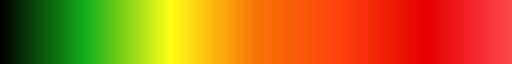

In [48]:
# Define colormap

cmap = colors.LinearSegmentedColormap.from_list("",["k","xkcd:green","xkcd:yellow","xkcd:orange","xkcd:red","xkcd:dark red","xkcd:maroon"],N=len(dateRange))
cmap = colors.LinearSegmentedColormap.from_list("",["k","xkcd:green","xkcd:yellow","xkcd:orange","xkcd:orangered","xkcd:red","xkcd:light red"],N=len(dateRange))
cmap

In [49]:
curgdf = getGeodataframeWithValue(curDate)
# curgdf

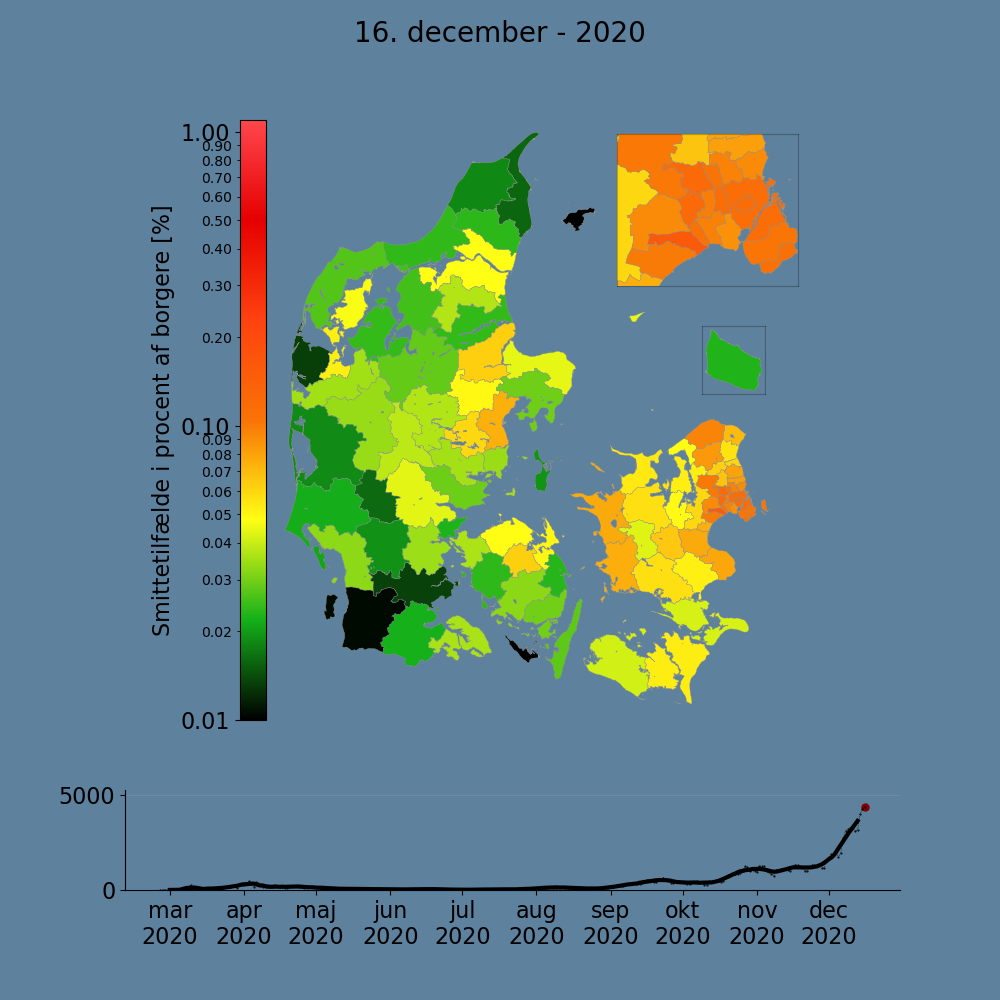

In [50]:
# fig,ax = plt.subplots() 

# curDate = np.datetime64('2022-01-02')

def MakeAndSaveFigure(curDate,frameNum):

    fig,(ax,axBot) = plt.subplots(2,1,figsize=(10,10),gridspec_kw={'height_ratios': [6, 1]}) 
    # axBot.plot(dfCount.Dato,totCounts,'k.:',markersize=1,linewidth=0.5)
    # axBot.plot(pf.rnTime(dfCount.Dato),pf.rnMean(totCounts),'k')

    curIndex = np.where(dfCount.Dato == curDate)[0][0]
    curTot = totCounts[curIndex]
    axBot.plot(curDate,curTot,'.',color='xkcd:dark red')

    axBot.plot(dfCount.Dato[:curIndex+1],totCounts[:curIndex+1],'k.:',markersize=1,linewidth=0.5)
    axBot.plot(pf.rnTime(dfCount.Dato[:curIndex+1]),pf.rnMean(totCounts[:curIndex+1]),'k')

    maxSoFar = np.max(totCounts[:curIndex+1])
    dailyMaxsSoFar = np.max(dailyMaxs[:curIndex+1])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("left", size="5%", pad=0.01)

    ax2 = inset_axes(ax,
                        width="20%", # width = 30% of parent_bbox
                        height=1, 
                        bbox_to_anchor=(.6, .35, .6, .5),
                        bbox_transform=ax.transAxes,
                        loc=10,
                        # bbox_to_anchor=(0,0)
                        )
                        
    ax3 = inset_axes(ax,
                        width="35%", 
                        height=1.75, 
                        bbox_to_anchor=(.35, .35,1,1),
                        bbox_transform=ax.transAxes,
                        loc=10,
                        # bbox_to_anchor=(0,0)
                        )

            
    bgColor = 'xkcd:greyish blue'
    fig.patch.set_facecolor(bgColor)
    ax.set_facecolor(bgColor)
    ax2.set_facecolor(bgColor)
    ax3.set_facecolor(bgColor)
    axBot.set_facecolor(bgColor)


    # gdf.plot(ax=ax,color='xkcd:grey')
    # getGeodataframeWithValue(np.datetime64('2021-10-02')).plot(ax=ax,column='Value',cmap=curcmap)

    curgdf = getGeodataframeWithValue(curDate)
    # norm=matplotlib.colors.LogNorm(vmin=world.pop_est.min(), vmax=world.pop_est.max()),
    
    curVMin = 0.01
    curgdf.loc[curgdf.Value < curVMin,'Value'] = curVMin

    # Make a small dataframe for just Bornholm
    borgdf = curgdf[curgdf.navn == 'Bornholms Kommune']

    # curVMin = 0.0001
    # curVMax = allMax
    # curVMin = 0.1
    # curVMax = 1000*allMax
    curVMin = 0.01
    curVMax = 100*allMax
    #curVMax = 100*dailyMaxsSoFar

    #curVMax = np.max([0.1,100*dailyMaxsSoFar])

    # curVMax = np.round(curVMax*10)/10
    # print(curVMax)

    #curcmap = 'turbo'
    curcmap = cmap

    # curgdf.plot(ax=ax ,color='k')
    curgdf.plot(ax=ax ,edgecolor='xkcd:grey',linewidth=0.25,column='Value',cmap=curcmap,norm=colors.LogNorm(vmin=curVMin, vmax=curVMax),legend=True,cax=cax)
    curgdf.plot(ax=ax3,edgecolor='xkcd:grey',linewidth=0.25,column='Value',cmap=curcmap,norm=colors.LogNorm(vmin=curVMin, vmax=curVMax))
    borgdf.plot(ax=ax2,edgecolor='xkcd:grey',linewidth=0.25,column='Value',cmap=curcmap,norm=colors.LogNorm(vmin=curVMin, vmax=curVMax))

    # # Create colorbar as a legend
    # sm = plt.cm.ScalarMappable(cmap=curcmap, norm=plt.Normalize(vmin=curVMin, vmax=curVMax))
    # # empty array for the data range
    # sm._A = []
    # cbar = fig.colorbar(sm, cax=cax)
    # cbar.ax.tick_params(labelsize=14) 

    cax.yaxis.set_label_position("left")
    cax.yaxis.tick_left()
    # print(cax.yaxis.get_ticks())

    

    # # curYticks = np.array([0.1,1,5,10])
    # curYticks = np.array([0.01,0.1,0.25,0.5,0.75,1])
    # # curYtickLabels = ['Stort\nfald','Fald','Uændret','Stigning','Stor\nstigning']
    # # curYtickLabels = ['0,01 %','0,1%','0,05%','0,1%']
    # cbar.set_ticks(curYticks)
    # # cbar.set_ticklabels(curYtickLabels)
    
    def fmt(x, pos):
        return f'{x:1.2f}'
        # a, b = '{:.2e}'.format(x).split('e')
        # b = int(b)
        # return r'${} times 10^{{{}}}$'.format(a, b)

    import matplotlib.ticker as ticker 
    cax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))
    cax.yaxis.set_minor_formatter(ticker.FuncFormatter(fmt))
    cax.tick_params(which='minor', labelsize=10) 


    # from matplotlib.ticker import ScalarFormatter
    # cax.yaxis.set_major_formatter(ScalarFormatter())
    # cax.yaxis.set_minor_formatter(ScalarFormatter())

    # # curYticks = cax.get_yticklabels()
    # curYticks = cax.get_yticks()
    # print(curYticks)
    
    # cax._colorbar.ax.yaxis.get_major_formatter().set_scientific(False)
    # cax.yaxis.get_major_formatter().set_scientific(False)
    # cax.yaxis.get_major_formatter().set_powerlimits((0, 0))
    # cax.yaxis.get_major_formatter().set_powerlimits((0, 0))
    # cax.ticklabel_format(axis='y',useOffset=False)

    cax.set_ylabel('Smittetilfælde i procent af borgere [%]')

    ax.set_xlim([4.3e5,7.5e5])
    ax.set_ylim([6.04e6,6.41e6])

    ax3.set_xlim([6.96e5,7.32e5])
    ax3.set_ylim([6.16e6,6.19e6])

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    ax2.spines['left'].set_alpha(0.25)
    ax2.spines['right'].set_alpha(0.25)
    ax2.spines['top'].set_alpha(0.25)
    ax2.spines['bottom'].set_alpha(0.25)
    ax2.set_xticks([])
    ax2.set_yticks([])

    ax3.spines['left'].set_alpha(0.25)
    ax3.spines['right'].set_alpha(0.25)
    ax3.spines['top'].set_alpha(0.25)
    ax3.spines['bottom'].set_alpha(0.25)
    ax3.set_xticks([])
    ax3.set_yticks([])

    # axBot.spines['left'].set_visible(False)
    axBot.spines['right'].set_visible(False)
    axBot.spines['top'].set_visible(False)
    # axBot.spines['bottom'].set_visible(False)
    axBot.set_ylim(bottom=0)
    axBot.set_ylim(top=maxSoFar*1.2)
    axBot.grid(axis='y',alpha=0.2)
    axBot.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

    curDateString = pd.to_datetime(curDate).strftime('%#d. %B - %Y')
    fig.suptitle(curDateString,fontsize=20)
    # fig.tight_layout()


    # curDateIso = pd.to_datetime(curDate).strftime('%Y-%m-%d')

    fig.savefig('../../kommuneAnimation/frame'+str(frameNum))


#curDate = np.datetime64('2020-04-02')
#MakeAndSaveFigure(curDate,0)
#curDate = np.datetime64('2020-12-20')
#MakeAndSaveFigure(curDate,1)
#curDate = np.datetime64('2021-07-15')
#MakeAndSaveFigure(curDate,2)
#curDate = np.datetime64('2021-12-20')
#MakeAndSaveFigure(curDate,3)
#curDate = np.datetime64('2022-01-20')
#MakeAndSaveFigure(curDate,4)
#curDate = np.datetime64('2022-02-20')
#MakeAndSaveFigure(curDate,5)

curDate = np.datetime64('2020-12-16')
MakeAndSaveFigure(curDate,0)

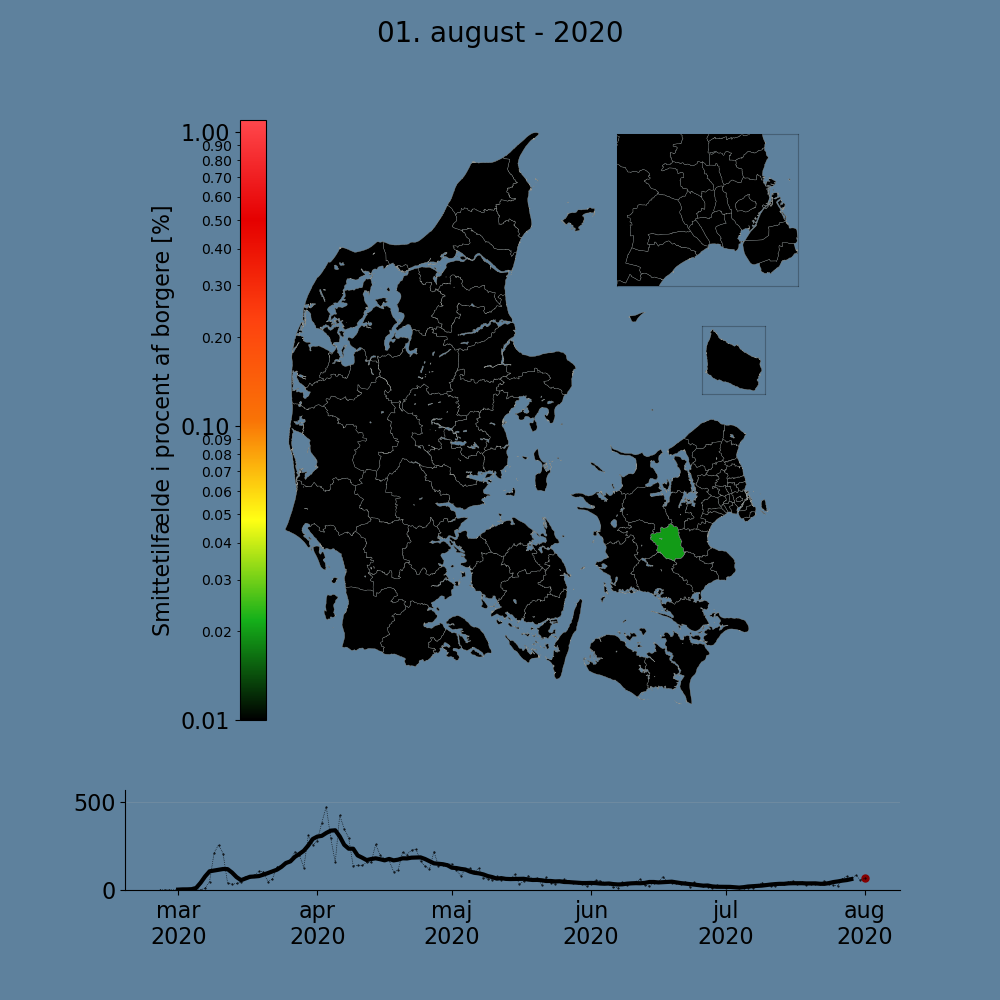

In [51]:
plt.close('all')
dfCount.Dato.values[0]

dateRange = np.arange(np.datetime64('2020-02-26'),np.datetime64('today'),np.timedelta64(1,'D'))
dateRange = np.arange(np.datetime64('2020-02-26'),np.datetime64('today'),np.timedelta64(30,'D'))

curDate = np.datetime64('2020-08-01')
# curgdf = getGeodataframeWithValue(curDate)
# curgdf.loc[curgdf.Value < 0.01,'Value'] = 0.01
# curgdf
MakeAndSaveFigure(curDate,frameNum=1)

In [56]:

dateRange = np.arange(np.datetime64('2020-03-11'),np.datetime64('2022-02-26'),np.timedelta64(1,'D'))

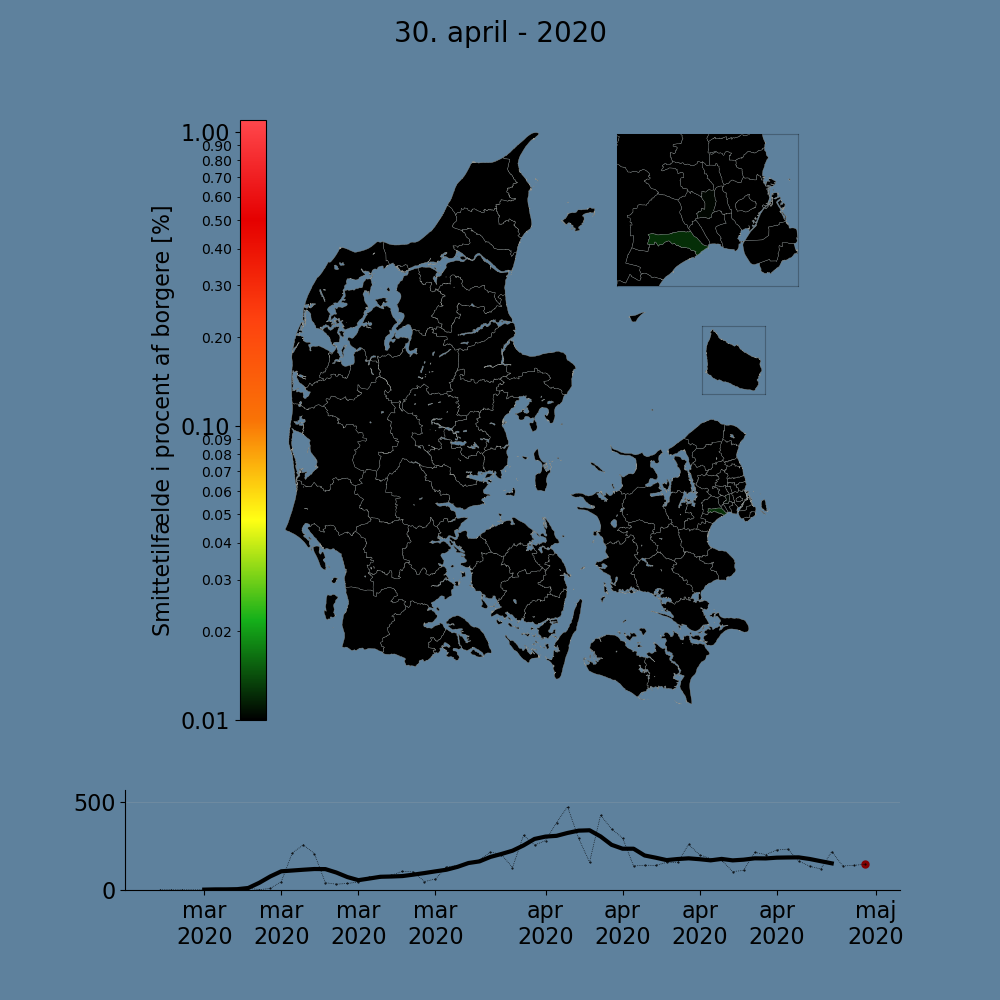

In [58]:


# dateRange = np.arange(np.datetime64('2020-04'),np.datetime64('2022-02'))
# # dateRange = np.arange(dfCount.Dato.values[0],np.datetime64('today'),np.timedelta64(7,'D'))
# dateRange = np.arange(np.datetime64('2020-02-26'),np.datetime64('today'),np.timedelta64(7,'D'))
dateRange = np.arange(np.datetime64('2020-03-11'),np.datetime64('2022-02-26'),np.timedelta64(1,'D'))
dateRange = np.arange(np.datetime64('2020-03-11'),np.datetime64('2020-05-01'),np.timedelta64(1,'D'))

#dateRange = np.arange(np.datetime64('2020-03-11'),np.datetime64('2022-02-26'),np.timedelta64(30,'D'))

for k, curDate in enumerate(dateRange):
    plt.close('all')
    MakeAndSaveFigure(curDate,frameNum=k)
    
    
#     # curDate = dateRange[k]
# # curDate = np.datetime64('2020-08-01')
# # MakeAndSaveFigure(curDate,frameNum=1)
# # curDate = np.datetime64('2021-01-15')
# # MakeAndSaveFigure(curDate,frameNum=2)
# # curDate = np.datetime64('2021-10-18')
# # MakeAndSaveFigure(curDate,frameNum=3)
# curDate = np.datetime64('2022-01-18')
# MakeAndSaveFigure(curDate,frameNum=4)

2022-02-26
717
2022-02-27
718
2022-02-28
719
2022-03-01
720
2022-03-02
721
2022-03-03
722
2022-03-04
723


ValueError: cannot set using a multi-index selection indexer with a different length than the value

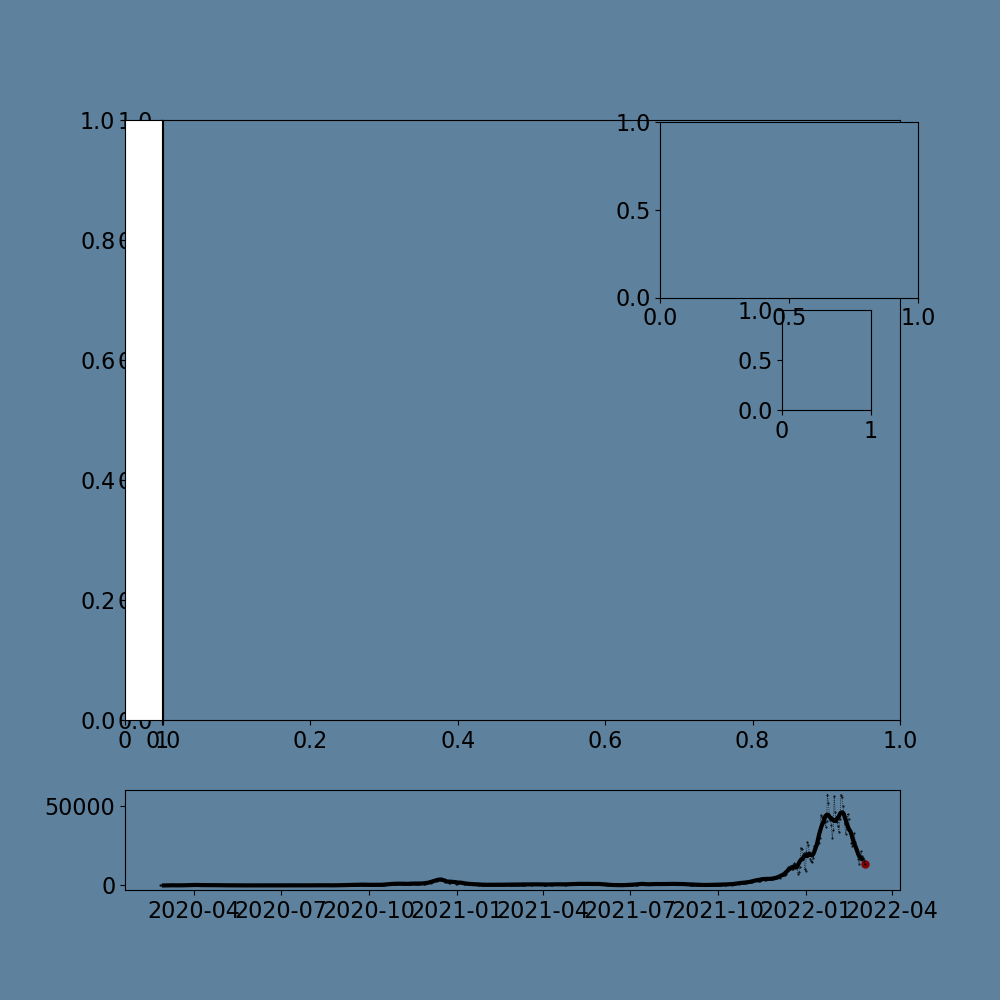

In [57]:

#dateRange = np.arange(np.datetime64('2020-03-11'),np.datetime64('2022-02-26'),np.timedelta64(1,'D'))
dateRange2 = np.arange(np.datetime64('2022-02-26'),np.datetime64('today'),np.timedelta64(1,'D'))

for k, curDate in enumerate(dateRange2):
    plt.close('all') 
    print(curDate)
    print(k+len(dateRange))
    MakeAndSaveFigure(curDate,frameNum=k+len(dateRange))

In [25]:
# # cax._colorbar.get_ticks()
# # cax.collections[1].__dict__
# # cax.collections[1]._axes.get_yticks()
# cax.__dict__
# cax._colorbar.__dict__
# cax._colorbar.ax.set_yticklabels(['asdf','asdf'])
# plt.show()

In [26]:
plt.close('all')